In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as dt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score            # 決定係数
from sklearn import linear_model
import statsmodels.api as sm
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D  #3Dplot
import plotly.graph_objects as go
from matplotlib.widgets import Slider

from pandas import DataFrame
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

sns.set()

import day.csv, hour.csv

In [3]:
df_day = pd.read_csv("day.csv", parse_dates=["dteday"])
df_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [4]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

C:\Users\satom\AppData\Local\Temp\ipykernel_14764\85836405.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df_day.corr(), dtype=np.bool))
C:\Users\satom\AppData\Local\Temp\ipykernel_14764\85836405.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_day.corr(), dtype=np.bool))
C:\Users\satom\AppData\Local\Temp\ipykernel_14764\85836405.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future ver

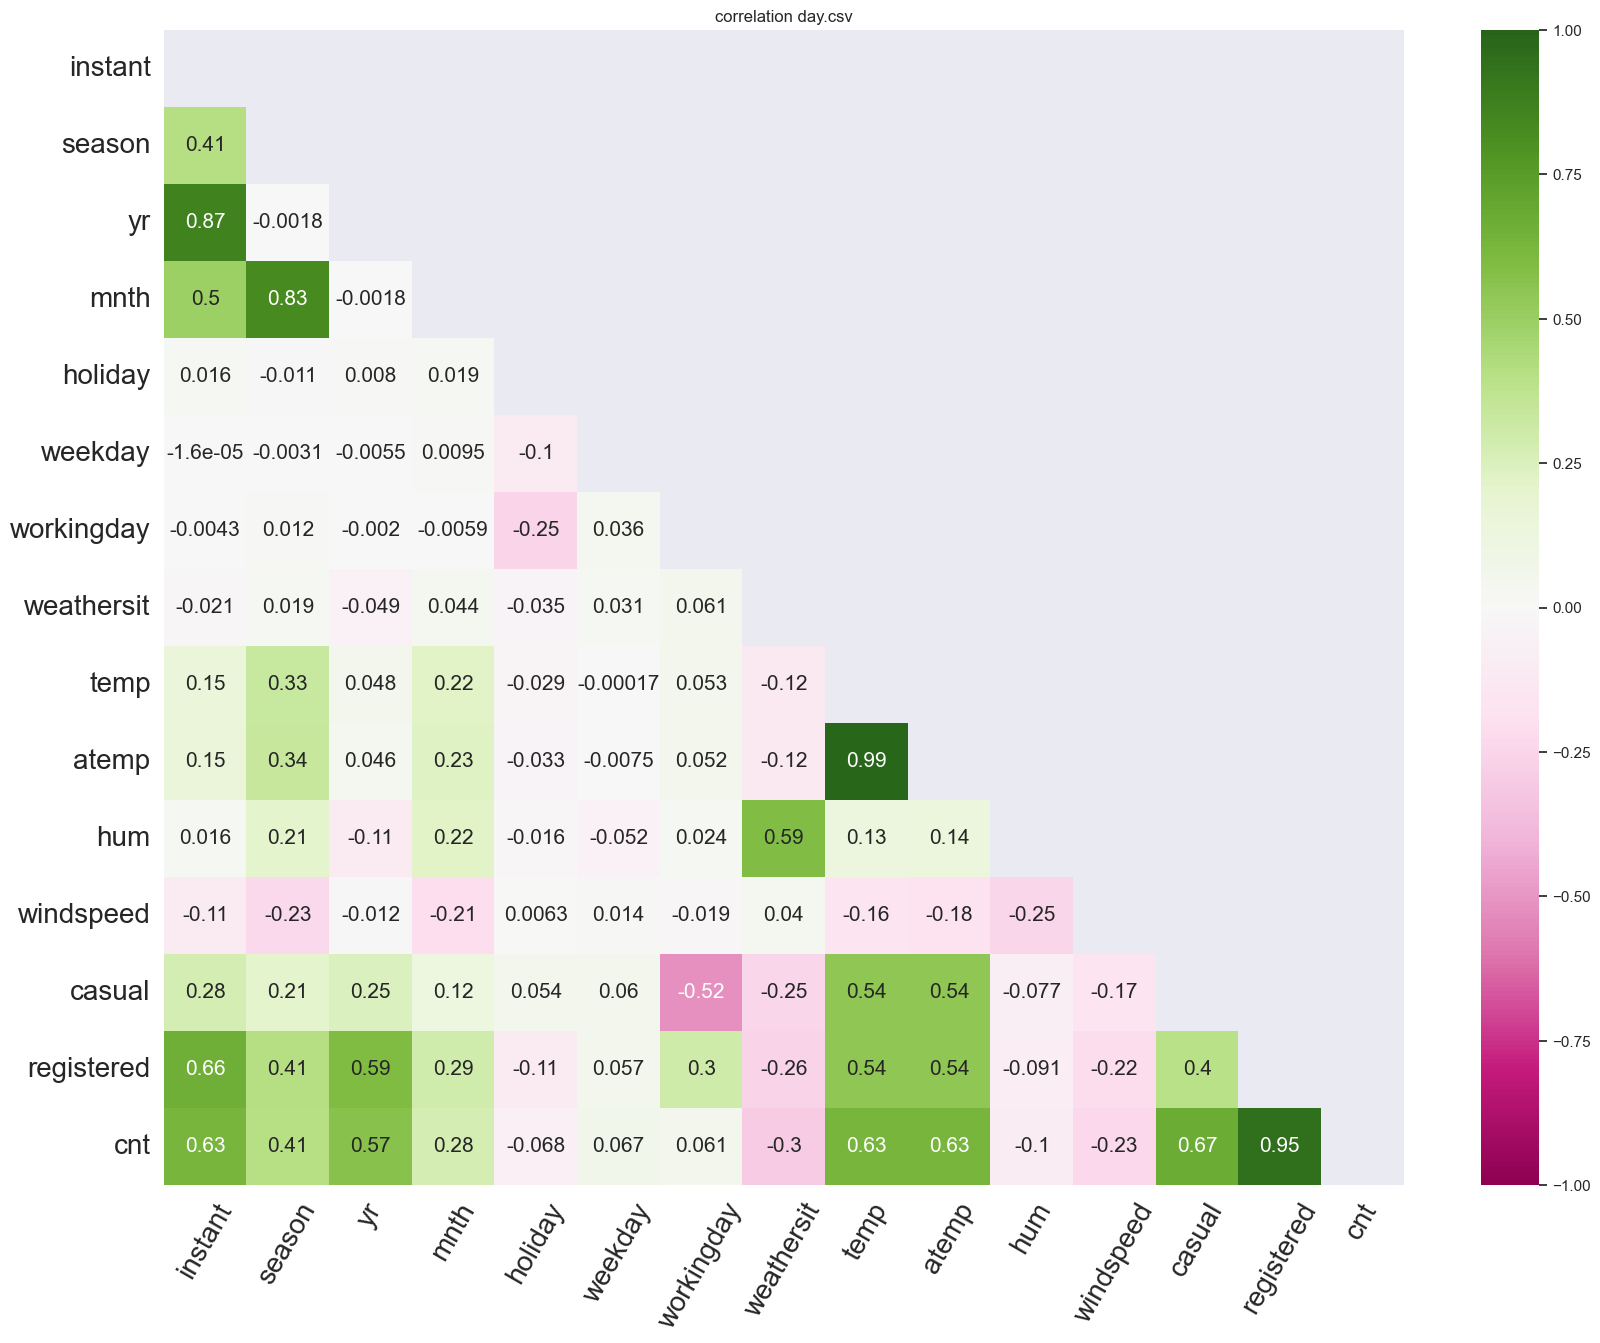

In [5]:
plt.figure(figsize= (20,15))
mask = np.triu(np.ones_like(df_day.corr(), dtype=np.bool))
ax = sns.heatmap(df_day.corr(), vmin=-1, vmax = 1, mask = mask, annot=True, annot_kws={"size": 15},cmap="PiYG")
plt.xticks(rotation=60)
plt.yticks(rotation = 0)
plt.title("correlation day.csv")
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.show()


create new columns, year, temeperature and feeling temperature in celsius, windspeed

In [6]:
df_day["year"] = df_day["yr"].apply(lambda value: 2011
if value < 1 else 2012
)
df_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2011
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2011
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2011
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,2011
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,2012
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,2012
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,2012
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,2012


In [7]:
t_min = -8
t_max = 39

df_day["temp_in_cel"] = t_min + df_day["temp"] * (t_max -t_min)
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,temp_in_cel
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,2011.500684,15.283085
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452,0.500342,8.603397
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,2011.000000,-5.220871
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,2011.000000,7.842925
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,2012.000000,15.421651
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,2012.000000,22.804575
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,2012.000000,32.498349


In [8]:
t_min = -16
t_max = 50

df_day["feeling_temp_in_cel"] = t_min + df_day["atemp"] * (t_max -t_min)
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,temp_in_cel,feeling_temp_in_cel
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,2011.500684,15.283085,15.307363
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452,0.500342,8.603397,10.755438
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,2011.000000,-5.220871,-10.781406
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,2011.000000,7.842925,6.297605
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,2012.000000,15.421651,16.124378
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,2012.000000,22.804575,24.167732
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,2012.000000,32.498349,39.499136


In [9]:
df_day["windspeed_a"] = df_day["windspeed"] * 67
df_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,temp_in_cel,feeling_temp_in_cel,windspeed_a
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2011,8.175849,7.999250,10.749882
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2011,9.083466,7.346774,16.652113
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2011,1.229108,-3.499270,16.636703
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,2011,1.400000,-1.999948,10.739832
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2011,2.666979,-0.868180,12.522300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,2012,3.945849,-1.041628,23.458911
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,2012,3.906651,0.833036,10.416557
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,2012,3.906651,-0.001600,8.333661
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,2012,4.024151,-0.707800,23.500518


In [10]:
df_hour = pd.read_csv("hour.csv", parse_dates= ["dteday"])
df_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [11]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [12]:
df_hour["year"] = df_hour["yr"].apply(lambda value: 2011
if value < 1 else 2012
)
df_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,2011
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,2011
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,2011
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,2011
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,2012
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,2012
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,2012
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,2012


In [13]:
t_min = -8
t_max = 39

df_hour["temp_in_cel"] = t_min + df_hour["temp"] * (t_max -t_min)
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,temp_in_cel
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,2011.502561,15.358397
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,0.500008,9.050138
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,-7.060000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,2011.000000,7.980000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,2012.000000,15.500000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,2012.000000,23.020000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,2012.000000,39.000000


In [14]:
t_min = -16
t_max = 50

df_hour["feeling_temp_in_cel"] = t_min + df_hour["atemp"] * (t_max -t_min)
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,temp_in_cel,feeling_temp_in_cel
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,2011.502561,15.358397,15.401157
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,0.500008,9.050138,11.342114
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,-7.060000,-16.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,2011.000000,7.980000,5.997800
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,2012.000000,15.500000,15.996800
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,2012.000000,23.020000,24.999200
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,2012.000000,39.000000,50.000000


In [15]:
df_day["windspeed_a"] = df_day["windspeed"] * 67
df_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,temp_in_cel,feeling_temp_in_cel,windspeed_a
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2011,8.175849,7.999250,10.749882
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2011,9.083466,7.346774,16.652113
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2011,1.229108,-3.499270,16.636703
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,2011,1.400000,-1.999948,10.739832
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2011,2.666979,-0.868180,12.522300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,2012,3.945849,-1.041628,23.458911
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,2012,3.906651,0.833036,10.416557
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,2012,3.906651,-0.001600,8.333661
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,2012,4.024151,-0.707800,23.500518


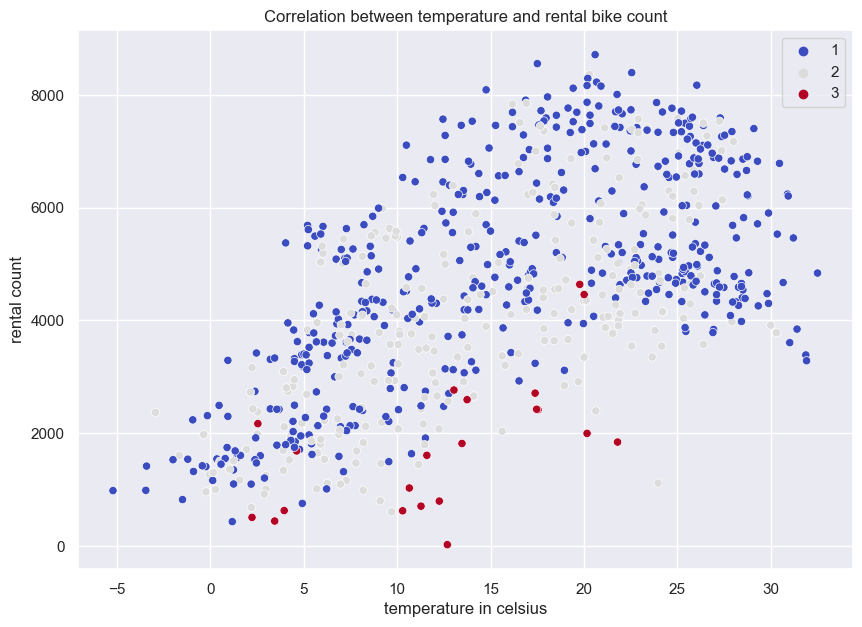

In [16]:
palette = sns.color_palette("coolwarm", as_cmap=True)
plt.figure(figsize=(10,7))
sns.scatterplot(data = df_day, x = df_day["temp_in_cel"], y = df_day["cnt"], hue = "weathersit", palette=palette)
#sns.regplot(data = df_day, x = df_day["temp_in_cel"], y = df_day["cnt"])
plt.title("Correlation between temperature and rental bike count")
plt.xlabel("temperature in celsius")
plt.ylabel("rental count")

plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


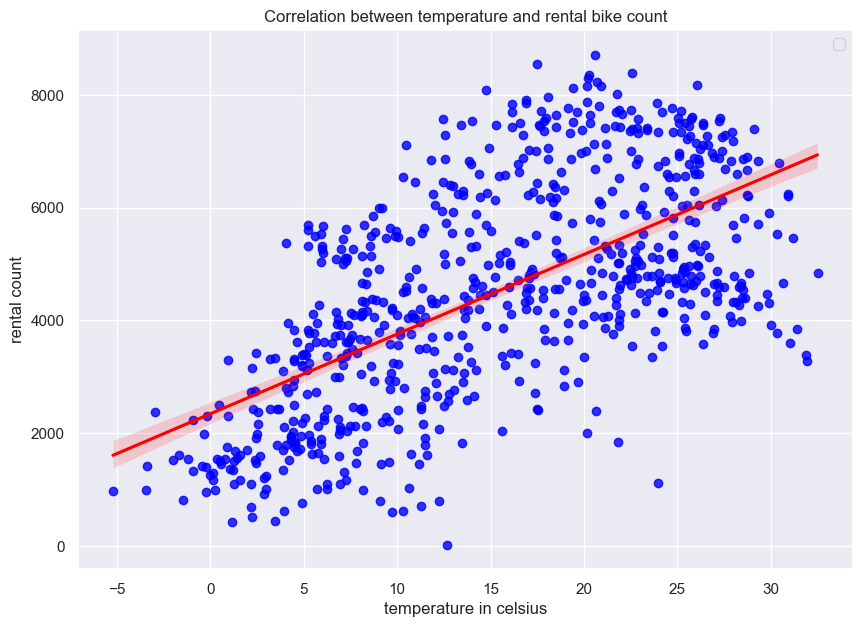

In [17]:
palette = sns.color_palette("flare", as_cmap=True)
plt.figure(figsize=(10,7))
sns.regplot(data = df_day, x = df_day["temp_in_cel"], y = df_day["cnt"], scatter_kws={"color": "blue"}, line_kws = {"color" : "red"})
plt.title("Correlation between temperature and rental bike count")
plt.xlabel("temperature in celsius")
plt.ylabel("rental count")

plt.legend()
plt.show()

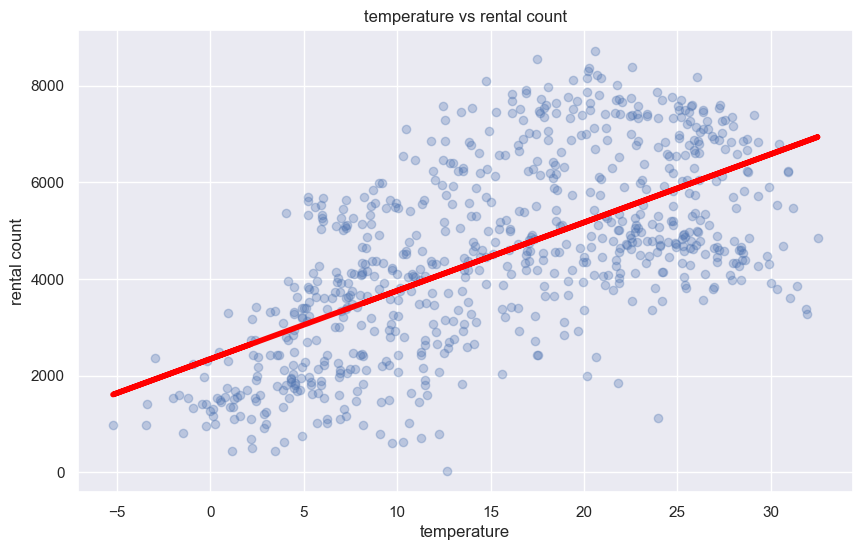

In [18]:
X = df_day[["temp_in_cel"]]
y = df_day["cnt"]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

linearReg = LinearRegression()
linearReg.fit(X, y)

plt.figure(figsize = (10,6))
plt.scatter(X,y, alpha = 0.3)
plt.plot(X, linearReg.predict(X), color = "red", linewidth = 4 )
plt.title("temperature vs rental count")
plt.xlabel("temperature")
plt.ylabel("rental count")
plt.show()


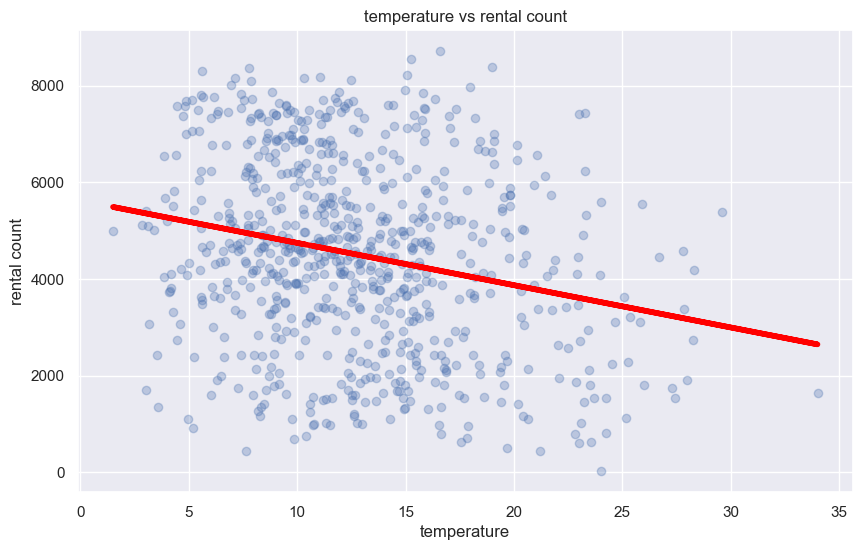

In [19]:
X = df_day[["windspeed_a"]]
y = df_day["cnt"]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

linearReg = LinearRegression()
linearReg.fit(X, y)

plt.figure(figsize = (10,6))
plt.scatter(X,y, alpha = 0.3)
plt.plot(X, linearReg.predict(X), color = "red", linewidth = 4 )
plt.title("temperature vs rental count")
plt.xlabel("temperature")
plt.ylabel("rental count")
plt.show()

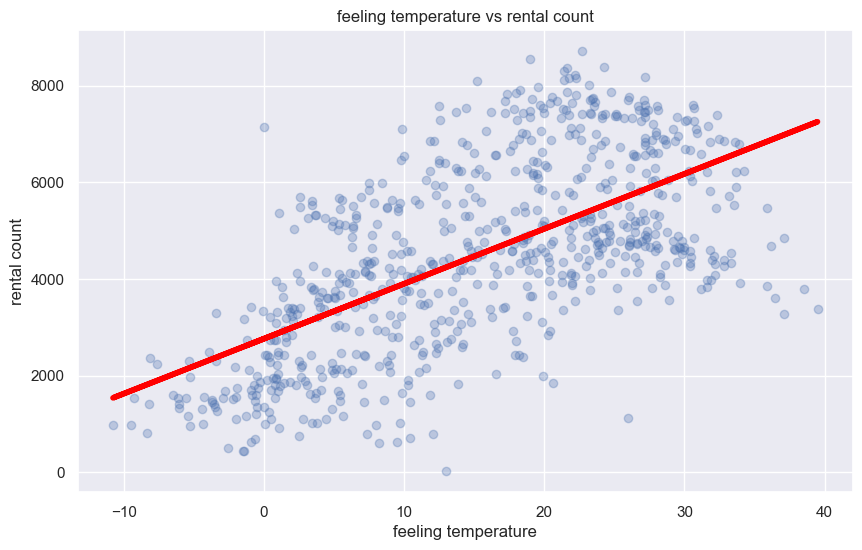

In [20]:
X = df_day[["feeling_temp_in_cel"]]
y = df_day["cnt"]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

linearReg = LinearRegression()
linearReg.fit(X, y)

plt.figure(figsize = (10,6))
plt.scatter(X,y, alpha = 0.3)
plt.plot(X, linearReg.predict(X), color = "red", linewidth = 4 )
plt.title("feeling temperature vs rental count")
plt.xlabel("feeling temperature")
plt.ylabel("rental count")
plt.show()

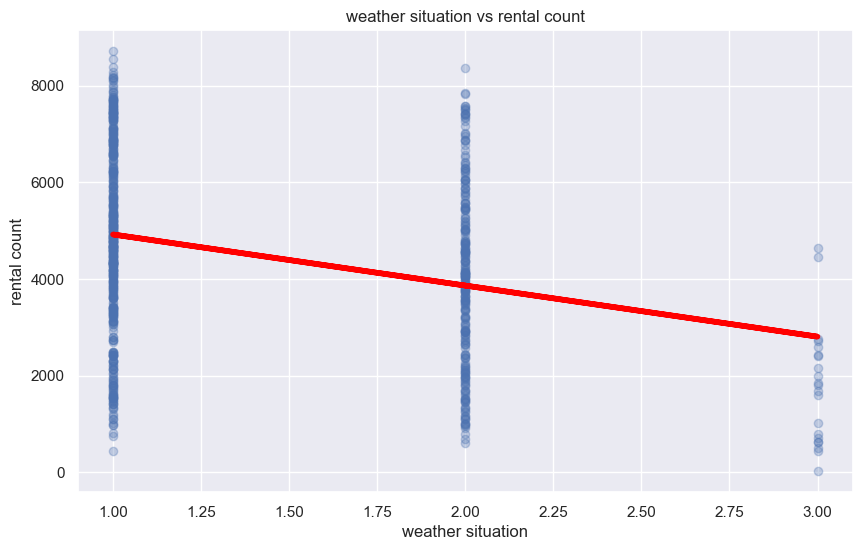

In [21]:
X = df_day[["weathersit"]]
y = df_day["cnt"]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

linearReg = LinearRegression()
linearReg.fit(X, y)

plt.figure(figsize = (10,6))
plt.scatter(X,y, alpha = 0.3)
plt.plot(X, linearReg.predict(X), color = "red", linewidth = 4 )
plt.title("weather situation vs rental count")
plt.xlabel("weather situation")
plt.ylabel("rental count")
plt.show()

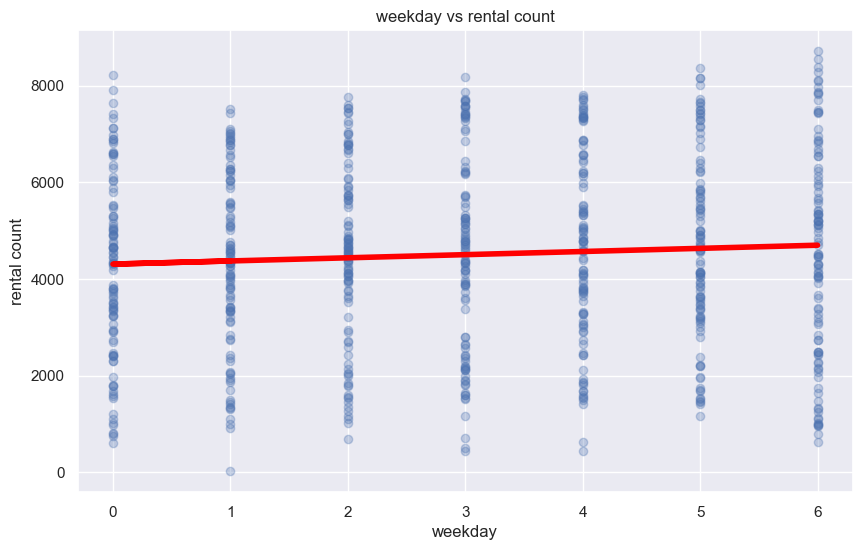

In [22]:
X = df_day[["weekday"]]
y = df_day["cnt"]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

linearReg = LinearRegression()
linearReg.fit(X, y)

plt.figure(figsize = (10,6))
plt.scatter(X,y, alpha = 0.3)
plt.plot(X, linearReg.predict(X), color = "red", linewidth = 4 )
plt.title("weekday vs rental count")
plt.xlabel("weekday")
plt.ylabel("rental count")
plt.show()

MAE = 1422.51,  RMSE = 1664.07,  score = 0.38
Coef =  [137.53122649]
Intercept = 2428.180622323114
r2 score for train 0.4008199959927181
r2 score for test 0.37540464616240443


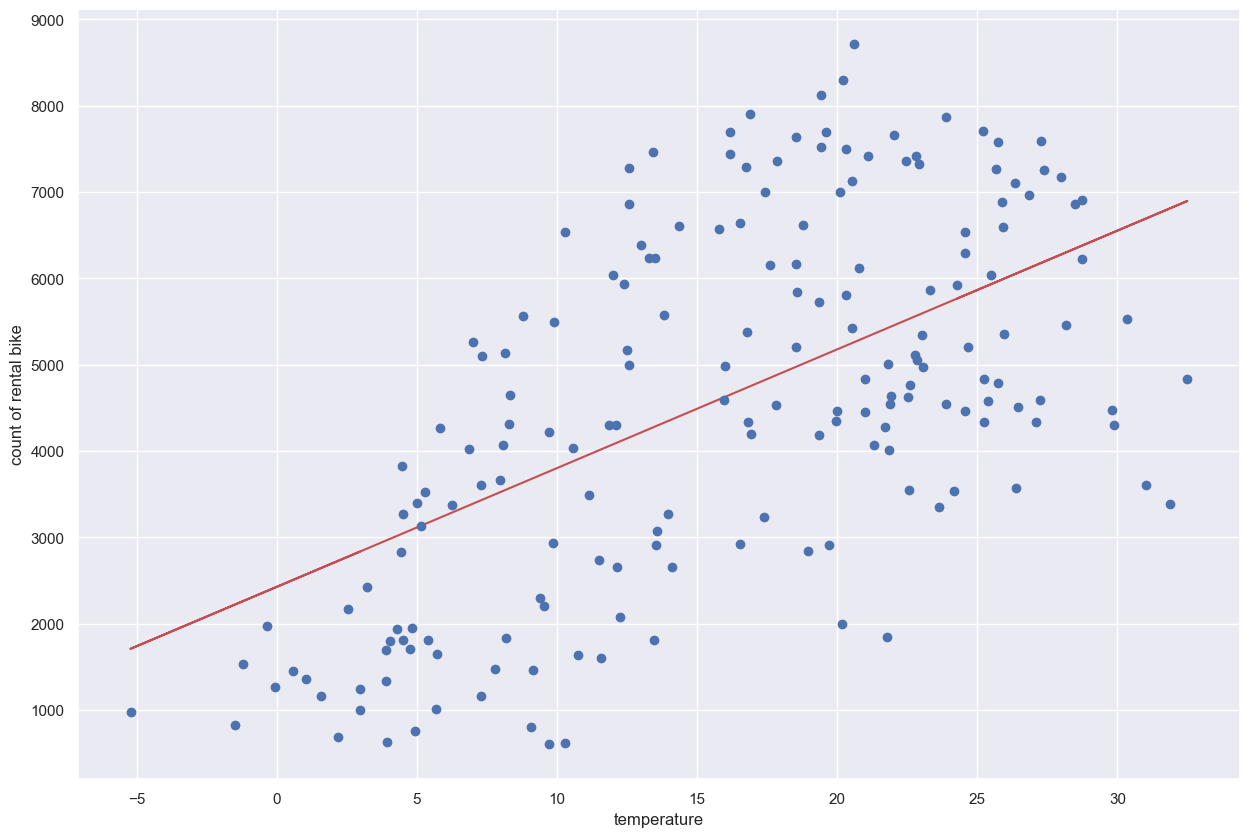

In [23]:
# https://qiita.com/fujin/items/7f0a7b6fc8fb662f510d
# feature, independent variable
X = df_day["temp_in_cel"] # temperature

# depandent variable
y = df_day["cnt"]

# train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
# I had problem here, got error message, AttributeError: 'Series' object has no attribute 'reshape'
# https://stackoverflow.com/questions/53723928/attributeerror-series-object-has-no-attribute-reshape

# LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

# prediction
y_pred = lr.predict(X_test)
# score
#
# 平均絶対誤差(MAE)
mae = mean_absolute_error(y_test, y_pred)
# 平方根平均二乗誤差（RMSE）
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  
# スコア
score = lr.score(X_test, y_test)
r2_score(y_train, lr.predict(X_train)), # 学習
r2_score(y_test,  lr.predict(X_test)) 

print("MAE = %.2f,  RMSE = %.2f,  score = %.2f" % (mae, rmse, score))
print("Coef = ", lr.coef_)
print("Intercept =", lr.intercept_)
plt.figure(figsize = (15,10))
plt.xlabel("temperature")
plt.ylabel("count of rental bike")
plt.plot(X_test, y_pred,"r-")
plt.plot(X_test, y_test, "o")
print("r2 score for train", r2_score(y_train, lr.predict(X_train))) # 学習
print("r2 score for test",r2_score( y_test,  lr.predict(X_test))) 

MAE = 1199.75,  RMSE = 1410.04,  score = 0.29
Coef =  [4442.62635963]
Intercept = 1483.442097207846


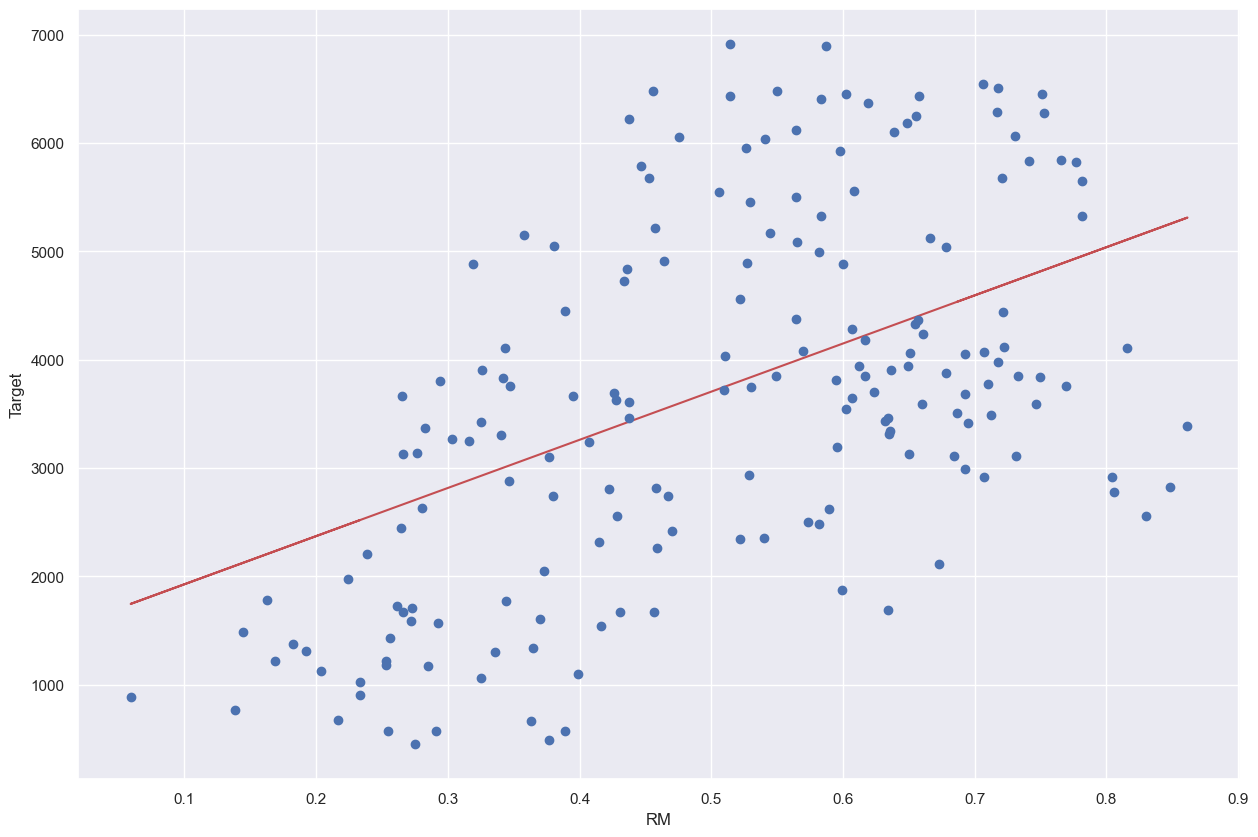

In [24]:
X = df_day["temp"] # temperature

# depandent variable
y = df_day["registered"]

# train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
# I had problem here, got error message, AttributeError: 'Series' object has no attribute 'reshape'
# https://stackoverflow.com/questions/53723928/attributeerror-series-object-has-no-attribute-reshape

# LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

# prediction
y_pred = lr.predict(X_test)
# score
#
# 平均絶対誤差(MAE)
mae = mean_absolute_error(y_test, y_pred)
# 平方根平均二乗誤差（RMSE）
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  
# スコア
score = lr.score(X_test, y_test)

print("MAE = %.2f,  RMSE = %.2f,  score = %.2f" % (mae, rmse, score))
print("Coef = ", lr.coef_)
print("Intercept =", lr.intercept_)
plt.figure(figsize = (15,10))
plt.xlabel("RM")
plt.ylabel("Target")
plt.plot(X_test, y_pred, "r-")
plt.plot(X_test, y_test, "o")

MAE = 439.20,  RMSE = 625.86,  score = 0.26
Coef =  [2021.34128561]
Intercept = -155.51128683937918


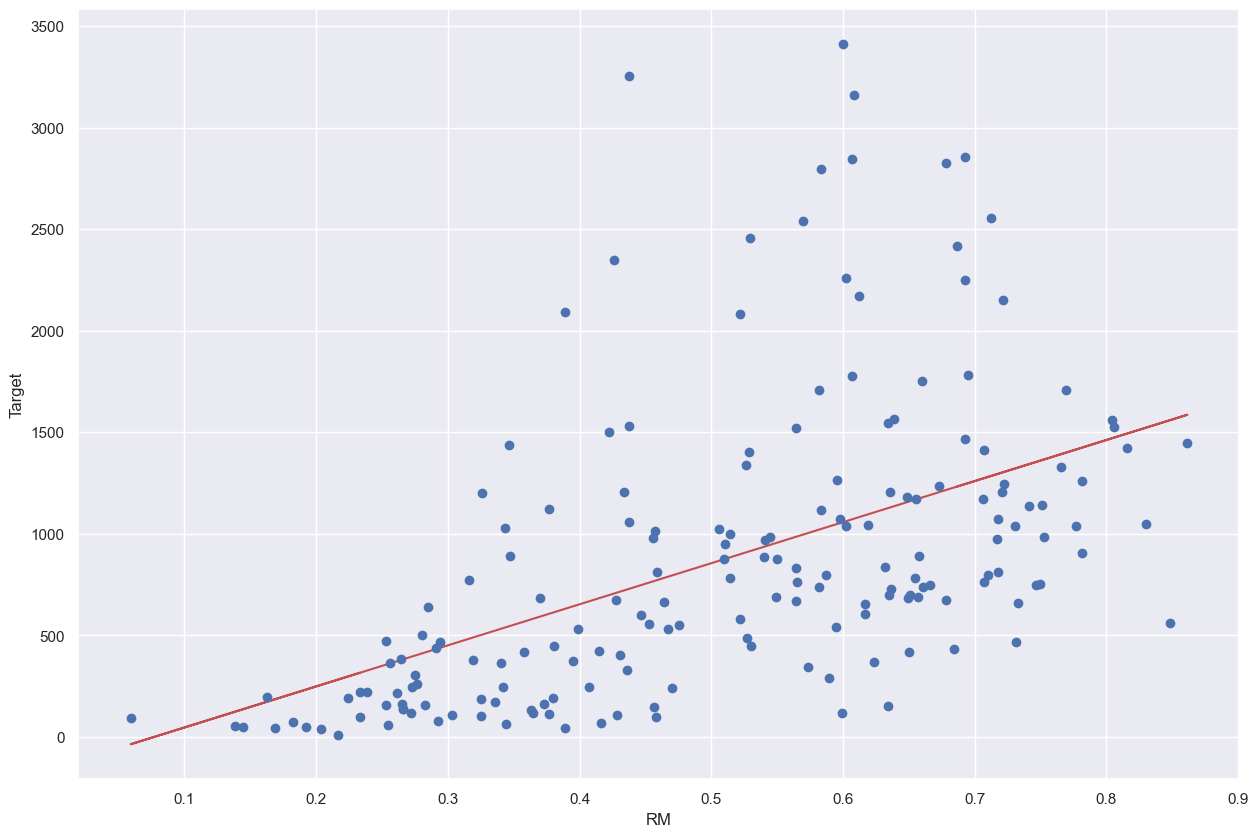

In [25]:
X = df_day["temp"] # temperature

# depandent variable
y = df_day["casual"]

# train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
# I had problem here, got error message, AttributeError: 'Series' object has no attribute 'reshape'
# https://stackoverflow.com/questions/53723928/attributeerror-series-object-has-no-attribute-reshape

# LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

# prediction
y_pred = lr.predict(X_test)
# score
#
# 平均絶対誤差(MAE)
mae = mean_absolute_error(y_test, y_pred)
# 平方根平均二乗誤差（RMSE）
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  
# スコア
score = lr.score(X_test, y_test)

print("MAE = %.2f,  RMSE = %.2f,  score = %.2f" % (mae, rmse, score))
print("Coef = ", lr.coef_)
print("Intercept =", lr.intercept_)
plt.figure(figsize = (15,10))
plt.xlabel("RM")
plt.ylabel("Target")
plt.plot(X_test, y_pred, "r-")
plt.plot(X_test, y_test, "o")

MAE = 1764.62,  RMSE = 2104.52,  score = 0.00
Coef =  [-99.93570844]
Intercept = 5777.301677467769


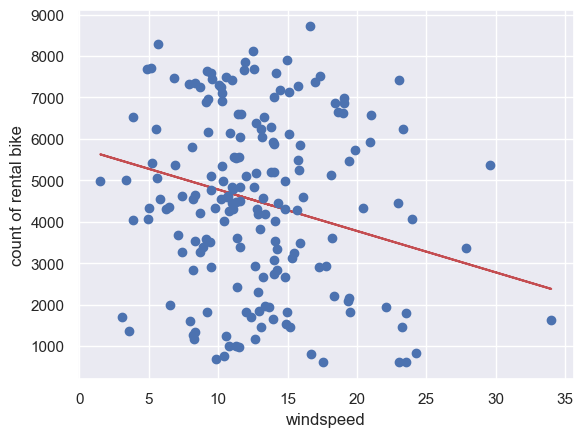

In [26]:
# https://qiita.com/fujin/items/7f0a7b6fc8fb662f510d
# feature, independent variable
X = df_day["windspeed_a"] # temperature

# depandent variable
y = df_day["cnt"]

# train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
# I had problem here, got error message, AttributeError: 'Series' object has no attribute 'reshape'
# https://stackoverflow.com/questions/53723928/attributeerror-series-object-has-no-attribute-reshape

# LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

# prediction
y_pred = lr.predict(X_test)
# score
#
# 平均絶対誤差(MAE)
mae = mean_absolute_error(y_test, y_pred)
# 平方根平均二乗誤差（RMSE）
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  
# スコア
score = lr.score(X_test, y_test)

print("MAE = %.2f,  RMSE = %.2f,  score = %.2f" % (mae, rmse, score))
print("Coef = ", lr.coef_)
print("Intercept =", lr.intercept_)

plt.xlabel("windspeed")
plt.ylabel("count of rental bike")
plt.plot(X_test, y_pred, "r-")
plt.plot(X_test, y_test, "o")

according to heatmap i chose two independent variables. temperature and season;polynomial regression

rmse : 1369.1757485112662
R: 0.4997825272357871
Coef =  [ 0.00000000e+00  9.85020284e+01  1.72747606e+03  1.12043457e+01
  3.38094261e+01 -8.56417799e+02 -5.18415080e-01  2.51811569e+00
 -2.25286307e+01  1.62279916e+02]
Intercept = 457.45141152426777


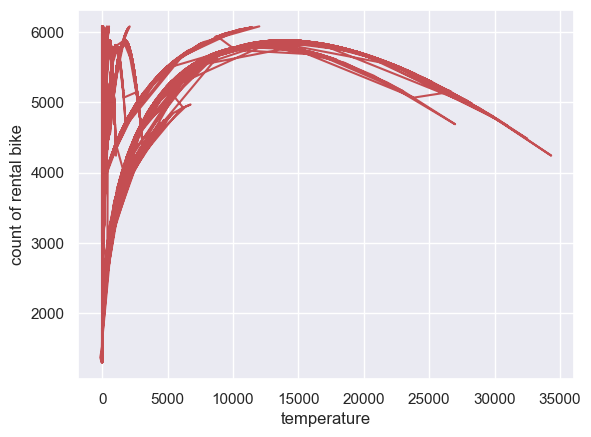

In [27]:
X = df_day[["temp_in_cel","season" ]] # temperature

# depandent variable
y = df_day["cnt"]
#transform into 2 dimensional feature
polynomial_features = PolynomialFeatures(degree = 3)
x_poly = polynomial_features.fit_transform(X)
# train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
# I had problem here, got error message, AttributeError: 'Series' object has no attribute 'reshape'
# https://stackoverflow.com/questions/53723928/attributeerror-series-object-has-no-attribute-reshape

# LinearRegression
lr = LinearRegression()
lr.fit(x_poly, y)

# prediction
y_pred = lr.predict(x_poly)
# score
rmse = np.sqrt(mean_squared_error(y,y_pred))
r2 = r2_score(y, y_pred)
print(f"rmse : {rmse}")
print (f"R: {r2}" )
print("Coef = ", lr.coef_)
print("Intercept =", lr.intercept_)

plt.xlabel("temperature")
plt.ylabel("count of rental bike")
#plt.scatter(x_poly,y)
plt.plot(x_poly, y_pred, "r-")


I made polynomial regression from this site:  https://di-acc2.com/programming/python/13862/

RMSE 学習 Train: 1391.39, テスト Test: 1523.14
R^2 学習 Train: 0.46, テスト Test: 0.44


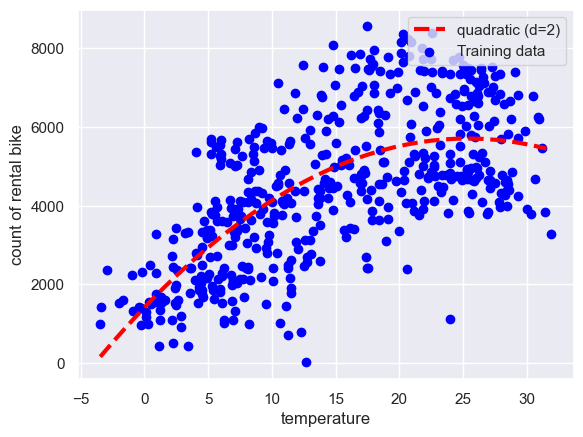

In [54]:
# independent variable
X = df_day["temp_in_cel" ] # temperature
# depandent variable
y = df_day["cnt"]

# train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

# LinearRegression
lr = LinearRegression()

# 2次の多項式特徴量のクラスをインスタンス化 instantiate 2 dimensional polynomial features
quadratic = PolynomialFeatures(
               degree = 2,                   # n dimension der polynomial 
               interaction_only = False,     # if true, ある特徴量を2乗以上した項がのぞかれる
               include_bias = True,          # if True, バイアス項を含める
               order = "C"                   # 出力する配列の計算順序
)

# データ演算・変換
X_quad_train  = quadratic.fit_transform(X_train)
# 回帰モデルに上記データを適合
lr.fit(X_quad_train, y_train)

"""データプロット　plot the data"""
# 多項式曲線を描くためのプロット
X_fit          = np.arange(X_train.min(), X_train.max(), 1)[:, np.newaxis]
X_quad_fit     = quadratic.fit_transform(X_fit)
y_quad_predict = lr.predict(X_quad_fit)

plt.plot(X_fit, 
         y_quad_predict, 
         label='quadratic (d=2)',
         color='red', 
         lw=3,
         linestyle='--'
        )

# 推論のために学習データ＆テストデータを変換
X_quad_train         = quadratic.fit_transform(X_train)
X_quad_test          = quadratic.fit_transform(X_test)

# 平均平方二乗誤差(RMSE)
print('RMSE 学習 Train: %.2f, テスト Test: %.2f' % (
        mean_squared_error(y_train, lr.predict(X_quad_train), squared=False),   # 学習
        mean_squared_error(y_test, lr.predict(X_quad_test),   squared=False)    # テスト
      ))

# 決定係数(R^2)
print('R^2 学習 Train: %.2f, テスト Test: %.2f' % (
        r2_score(y_train, lr.predict(X_quad_train)), # 学習
        r2_score(y_test,  lr.predict(X_quad_test))   # テスト
      ))

# トレーニングデータのプロット
plt.scatter(X_train, y_train, label='Training data', color='blue')
# グラフの書式設定
plt.xlabel('temperature')
plt.ylabel('count of rental bike')
plt.legend(loc='upper right')
plt.show()

RMSE 学習 Train: 1242.10, テスト Test: 1301.57
R^2 学習 Train: 0.34, テスト Test: 0.36


c:\Users\satom\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12488 (\N{KATAKANA LETTER TO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\satom\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12524 (\N{KATAKANA LETTER RE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\satom\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\satom\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12491 (\N{KATAKANA LETTER NI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\satom\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sa

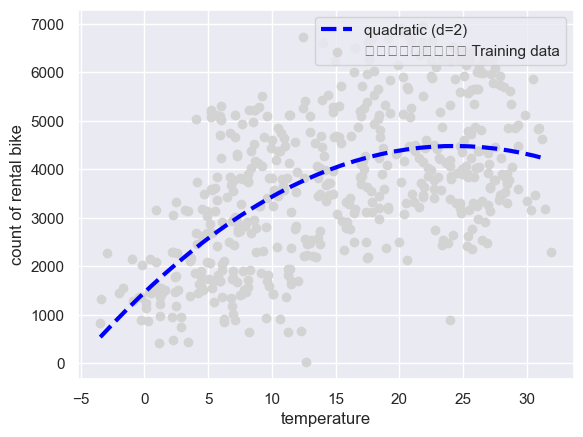

In [29]:
# independent variable
X = df_day["temp_in_cel" ] # temperature
# depandent variable
y = df_day["registered"]

# train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
# I had problem here, got error message, AttributeError: 'Series' object has no attribute 'reshape'
# https://stackoverflow.com/questions/53723928/attributeerror-series-object-has-no-attribute-reshape

# LinearRegression
lr = LinearRegression()

# 2次の多項式特徴量のクラスをインスタンス化 instantiate 2 dimensional polynomial features
quadratic = PolynomialFeatures(
               degree = 2,                   # n dimension der polynomial 
               interaction_only = False,     # if true, ある特徴量を2乗以上した項がのぞかれる
               include_bias = True,          # if True, バイアス項を含める
               order = "C"                   # 出力する配列の計算順序
)

# データ演算・変換
X_quad_train  = quadratic.fit_transform(X_train)
# 回帰モデルに上記データを適合
lr.fit(X_quad_train, y_train)

"""データプロット　plot the data"""
# 多項式曲線を描くためのプロット
X_fit          = np.arange(X_train.min(), X_train.max(), 1)[:, np.newaxis]
X_quad_fit     = quadratic.fit_transform(X_fit)
y_quad_predict = lr.predict(X_quad_fit)

plt.plot(X_fit, 
         y_quad_predict, 
         label='quadratic (d=2)',
         color='blue', 
         lw=3,
         linestyle='--'
        )

# 推論のために学習データ＆テストデータを変換
X_quad_train         = quadratic.fit_transform(X_train)
X_quad_test          = quadratic.fit_transform(X_test)

# 平均平方二乗誤差(RMSE)
print('RMSE 学習 Train: %.2f, テスト Test: %.2f' % (
        mean_squared_error(y_train, lr.predict(X_quad_train), squared=False),   # 学習
        mean_squared_error(y_test, lr.predict(X_quad_test),   squared=False)    # テスト
      ))

# 決定係数(R^2)
print('R^2 学習 Train: %.2f, テスト Test: %.2f' % (
        r2_score(y_train, lr.predict(X_quad_train)), # 学習
        r2_score(y_test,  lr.predict(X_quad_test))   # テスト
      ))

# トレーニングデータのプロット
plt.scatter(X_train, y_train, label='トレーニングデータ Training data', color='lightgray')
# グラフの書式設定
plt.xlabel('temperature')
plt.ylabel('count of rental bike')
plt.legend(loc='upper right')
plt.show()

RMSE 学習 Train: 549.36, テスト Test: 605.18
R^2 学習 Train: 0.33, テスト Test: 0.28


c:\Users\satom\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12488 (\N{KATAKANA LETTER TO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\satom\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12524 (\N{KATAKANA LETTER RE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\satom\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\satom\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12491 (\N{KATAKANA LETTER NI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\satom\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sa

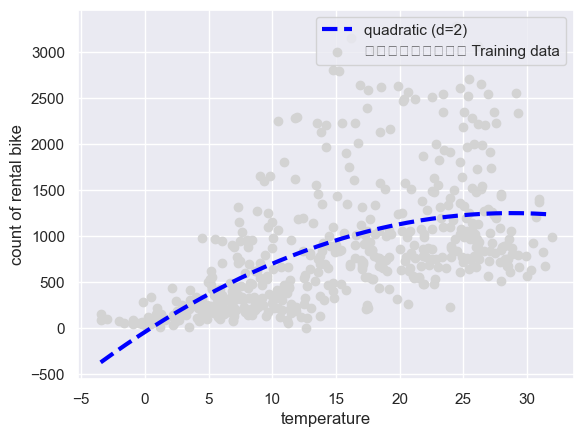

In [30]:
# independent variable
X = df_day["temp_in_cel" ] # temperature
# depandent variable
y = df_day["casual"]

# train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
# I had problem here, got error message, AttributeError: 'Series' object has no attribute 'reshape'
# https://stackoverflow.com/questions/53723928/attributeerror-series-object-has-no-attribute-reshape

# LinearRegression
lr = LinearRegression()

# 2次の多項式特徴量のクラスをインスタンス化 instantiate 2 dimensional polynomial features
quadratic = PolynomialFeatures(
               degree = 2,                   # n dimension der polynomial 
               interaction_only = False,     # if true, ある特徴量を2乗以上した項がのぞかれる
               include_bias = True,          # if True, バイアス項を含める
               order = "C"                   # 出力する配列の計算順序
)

# データ演算・変換
X_quad_train  = quadratic.fit_transform(X_train)
# 回帰モデルに上記データを適合
lr.fit(X_quad_train, y_train)

"""データプロット　plot the data"""
# 多項式曲線を描くためのプロット
X_fit          = np.arange(X_train.min(), X_train.max(), 1)[:, np.newaxis]
X_quad_fit     = quadratic.fit_transform(X_fit)
y_quad_predict = lr.predict(X_quad_fit)

plt.plot(X_fit, 
         y_quad_predict, 
         label='quadratic (d=2)',
         color='blue', 
         lw=3,
         linestyle='--'
        )

# 推論のために学習データ＆テストデータを変換
X_quad_train         = quadratic.fit_transform(X_train)
X_quad_test          = quadratic.fit_transform(X_test)

# 平均平方二乗誤差(RMSE)
print('RMSE 学習 Train: %.2f, テスト Test: %.2f' % (
        mean_squared_error(y_train, lr.predict(X_quad_train), squared=False),   # 学習
        mean_squared_error(y_test, lr.predict(X_quad_test),   squared=False)    # テスト
      ))

# 決定係数(R^2)
print('R^2 学習 Train: %.2f, テスト Test: %.2f' % (
        r2_score(y_train, lr.predict(X_quad_train)), # 学習
        r2_score(y_test,  lr.predict(X_quad_test))   # テスト
      ))

# トレーニングデータのプロット
plt.scatter(X_train, y_train, label='トレーニングデータ Training data', color='lightgray')
# グラフの書式設定
plt.xlabel('temperature')
plt.ylabel('count of rental bike')
plt.legend(loc='upper right')
plt.show()

RMSE 学習 Train: 1380.90, テスト Test: 1507.02
R^2 学習 Train: 0.47, テスト Test: 0.45


c:\Users\satom\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12488 (\N{KATAKANA LETTER TO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\satom\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12524 (\N{KATAKANA LETTER RE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\satom\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\satom\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12491 (\N{KATAKANA LETTER NI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\satom\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sa

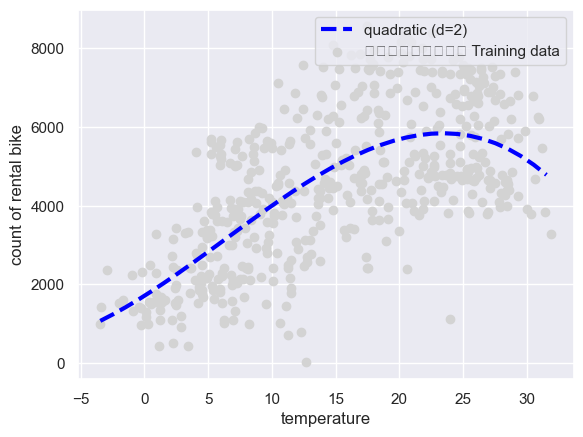

In [31]:
# independent variable
X = df_day["temp_in_cel" ] # temperature
# depandent variable
y = df_day["cnt"]

# train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

# LinearRegression
lr = LinearRegression()

# 2次の多項式特徴量のクラスをインスタンス化 instantiate 2 dimensional polynomial features
quadratic = PolynomialFeatures(
               degree = 3,                   # n dimension der polynomial 
               interaction_only = False,     # if true, ある特徴量を2乗以上した項がのぞかれる
               include_bias = True,          # if True, バイアス項を含める
               order = "C"                   # 出力する配列の計算順序
)

# データ演算・変換
X_quad_train  = quadratic.fit_transform(X_train)
# 回帰モデルに上記データを適合
lr.fit(X_quad_train, y_train)

"""データプロット　plot the data"""
# 多項式曲線を描くためのプロット
X_fit          = np.arange(X_train.min(), X_train.max(), 1)[:, np.newaxis]
X_quad_fit     = quadratic.fit_transform(X_fit)
y_quad_predict = lr.predict(X_quad_fit)

plt.plot(X_fit, 
         y_quad_predict, 
         label='quadratic (d=2)',
         color='blue', 
         lw=3,
         linestyle='--'
        )

# 推論のために学習データ＆テストデータを変換
X_quad_train         = quadratic.fit_transform(X_train)
X_quad_test          = quadratic.fit_transform(X_test)

# 平均平方二乗誤差(RMSE)
print('RMSE 学習 Train: %.2f, テスト Test: %.2f' % (
        mean_squared_error(y_train, lr.predict(X_quad_train), squared=False),   # 学習
        mean_squared_error(y_test, lr.predict(X_quad_test),   squared=False)    # テスト
      ))

# 決定係数(R^2)
print('R^2 学習 Train: %.2f, テスト Test: %.2f' % (
        r2_score(y_train, lr.predict(X_quad_train)), # 学習
        r2_score(y_test,  lr.predict(X_quad_test))   # テスト
      ))

# トレーニングデータのプロット
plt.scatter(X_train, y_train, label='トレーニングデータ Training data', color='lightgray')
# グラフの書式設定
plt.xlabel('temperature')
plt.ylabel('count of rental bike')
plt.legend(loc='upper right')
plt.show()

regression model: monthly changeing of rental count

In [32]:
df_day_new = df_day.set_index("dteday")
df_day_new

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,temp_in_cel,feeling_temp_in_cel,windspeed_a
dteday,,,,,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2011,8.175849,7.999250,10.749882
2011-01-02,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2011,9.083466,7.346774,16.652113
2011-01-03,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2011,1.229108,-3.499270,16.636703
2011-01-04,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,2011,1.400000,-1.999948,10.739832
2011-01-05,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2011,2.666979,-0.868180,12.522300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,727,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,2012,3.945849,-1.041628,23.458911
2012-12-28,728,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,2012,3.906651,0.833036,10.416557
2012-12-29,729,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,2012,3.906651,-0.001600,8.333661


In [33]:
mnthly_df_day = df_day_new.resample(rule = "M").mean().round()
mnthly_df_day

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,temp_in_cel,feeling_temp_in_cel,windspeed_a
dteday,,,,,,,,,,,,,,,,,,,
2011-01-31,16.0,1.0,0.0,1.0,0.0,3.0,1.0,1.0,0.0,0.0,1.0,0.0,99.0,1133.0,1232.0,2011.0,1.0,-3.0,13.0
2011-02-28,46.0,1.0,0.0,2.0,0.0,3.0,1.0,1.0,0.0,0.0,1.0,0.0,223.0,1499.0,1722.0,2011.0,5.0,3.0,15.0
2011-03-31,75.0,1.0,0.0,3.0,0.0,3.0,1.0,2.0,0.0,0.0,1.0,0.0,414.0,1652.0,2066.0,2011.0,8.0,5.0,16.0
2011-04-30,106.0,2.0,0.0,4.0,0.0,3.0,1.0,2.0,0.0,0.0,1.0,0.0,745.0,2417.0,3162.0,2011.0,14.0,14.0,16.0
2011-05-31,136.0,2.0,0.0,5.0,0.0,3.0,1.0,1.0,1.0,1.0,1.0,0.0,1002.0,3380.0,4381.0,2011.0,19.0,20.0,12.0
2011-06-30,166.0,2.0,0.0,6.0,0.0,3.0,1.0,1.0,1.0,1.0,1.0,0.0,1020.0,3763.0,4784.0,2011.0,25.0,27.0,12.0
2011-07-31,197.0,3.0,0.0,7.0,0.0,3.0,1.0,1.0,1.0,1.0,1.0,0.0,1176.0,3384.0,4559.0,2011.0,28.0,31.0,12.0
2011-08-31,228.0,3.0,0.0,8.0,0.0,3.0,1.0,1.0,1.0,1.0,1.0,0.0,930.0,3479.0,4409.0,2011.0,25.0,27.0,13.0
2011-09-30,258.0,3.0,0.0,9.0,0.0,3.0,1.0,2.0,1.0,1.0,1.0,0.0,885.0,3362.0,4247.0,2011.0,21.0,22.0,10.0


RMSE平均二乗誤差 学習 Train: 1496.67, テスト Test: 1599.31
MAE平均絶対誤差 学習 Train: 1255.67, テスト Test: 1359.81
R^2 学習 Train: 0.37, テスト Test: 0.38


c:\Users\satom\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12488 (\N{KATAKANA LETTER TO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\satom\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12524 (\N{KATAKANA LETTER RE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\satom\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\satom\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12491 (\N{KATAKANA LETTER NI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\satom\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sa

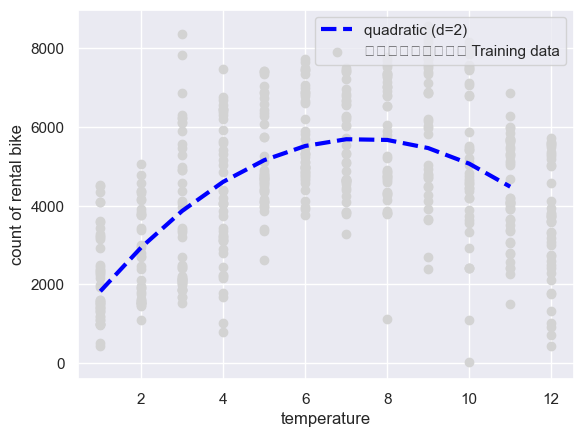

In [34]:
# independent variable
X = df_day["mnth" ] # temperature
# depandent variable
y = df_day["cnt"]

# train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

# LinearRegression
lr = LinearRegression()

# 2次の多項式特徴量のクラスをインスタンス化 instantiate 2 dimensional polynomial features
quadratic = PolynomialFeatures(
               degree = 2,                   # n dimension der polynomial 
               interaction_only = False,     # if true, ある特徴量を2乗以上した項がのぞかれる
               include_bias = True,          # if True, バイアス項を含める
               order = "C"                   # 出力する配列の計算順序
)

# データ演算・変換
X_quad_train  = quadratic.fit_transform(X_train)
# 回帰モデルに上記データを適合
lr.fit(X_quad_train, y_train)

"""データプロット　plot the data"""
# 多項式曲線を描くためのプロット
X_fit          = np.arange(X_train.min(), X_train.max(), 1)[:, np.newaxis]
X_quad_fit     = quadratic.fit_transform(X_fit)
y_quad_predict = lr.predict(X_quad_fit)

plt.plot(X_fit, 
         y_quad_predict, 
         label='quadratic (d=2)',
         color='blue', 
         lw=3,
         linestyle='--'
        )

# 推論のために学習データ＆テストデータを変換
X_quad_train         = quadratic.fit_transform(X_train)
X_quad_test          = quadratic.fit_transform(X_test)

# 平均平方二乗誤差(RMSE)
print('RMSE平均二乗誤差 学習 Train: %.2f, テスト Test: %.2f' % (
        mean_squared_error(y_train, lr.predict(X_quad_train), squared=False),   # 学習
        mean_squared_error(y_test, lr.predict(X_quad_test),   squared=False)    # テスト
      ))

print('MAE平均絶対誤差 学習 Train: %.2f, テスト Test: %.2f' % (
        mean_absolute_error(y_train, lr.predict(X_quad_train)),   # 学習
        mean_absolute_error(y_test, lr.predict(X_quad_test))    # テスト
      ))

# 決定係数(R^2)
print('R^2 学習 Train: %.2f, テスト Test: %.2f' % (
        r2_score(y_train, lr.predict(X_quad_train)), # 学習
        r2_score(y_test,  lr.predict(X_quad_test))   # テスト
      ))

# トレーニングデータのプロット
plt.scatter(X_train, y_train, label='トレーニングデータ Training data', color='lightgray')
# グラフの書式設定
plt.xlabel('temperature')
plt.ylabel('count of rental bike')
plt.legend(loc='upper right')
plt.show()

In [35]:
df_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,temp_in_cel,feeling_temp_in_cel,windspeed_a
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2011,8.175849,7.999250,10.749882
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2011,9.083466,7.346774,16.652113
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2011,1.229108,-3.499270,16.636703
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,2011,1.400000,-1.999948,10.739832
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2011,2.666979,-0.868180,12.522300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,2012,3.945849,-1.041628,23.458911
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,2012,3.906651,0.833036,10.416557
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,2012,3.906651,-0.001600,8.333661
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,2012,4.024151,-0.707800,23.500518


In [36]:
from sklearn import linear_model

X = df_day[["season", "year", "workingday", "holiday", "weathersit", "temp_in_cel", "windspeed_a"]]
y = df_day["cnt"]
X_train, X_test, Y_train, Y_test = train_test_split(X,y, random_state=42, test_size=0.2)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

print("変数xのトレーニング用データ:", X_train, sep="\n")
print("変数xのテスト用データ:", X_test, sep="\n")

multi_lreg = linear_model.LinearRegression()
multi_lreg.fit(X_train, y_train )
multi_lreg.score(X_test, y_test)

""" model = linear_model.LinearRegression()
model.fit(X,y)
model.coef_

coefficient = model.coef_
# データフレームに変換し、カラム名とインデックス名を指定
df_coefficient = pd.DataFrame(coefficient,
                              columns=["coefficient"],
                              index=["season", "year", "workingday", "holiday", "weathersit", "temp_in_cel", "windspeed_a"])
df_coefficient
model.intercept_
model.score(X, y) """

変数xのトレーニング用データ:
[[4.0000000e+00]
 [2.0120000e+03]
 [1.0000000e+00]
 ...
 [2.0000000e+00]
 [1.1387500e+01]
 [1.6791339e+01]]
変数xのテスト用データ:
[[4.000000e+00]
 [2.012000e+03]
 [1.000000e+00]
 ...
 [1.000000e+00]
 [1.914250e+01]
 [8.500357e+00]]


ValueError: Found input variables with inconsistent numbers of samples: [4088, 511]

In [ ]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


C:\Users\satom\AppData\Local\Temp\ipykernel_14764\2264414046.py:29: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax=Axes3D(fig)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


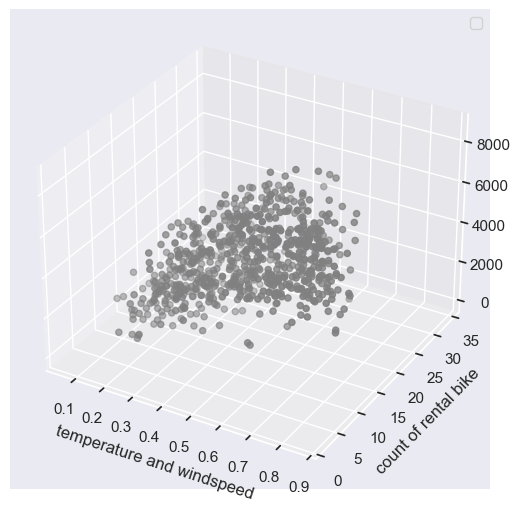

In [39]:
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D  #3Dplot
import plotly.graph_objects as go


X = df_day[["temp", "windspeed_a"]]
y = df_day["cnt"]
x1 = df_day[["temp"]]
x2 = df_day[["windspeed_a"]]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

multi_lreg = linear_model.LinearRegression()
multi_lreg.fit(X_train, y_train )
multi_lreg.score(X_test, y_test)
""" 
fig = go.Figure(go.Scatter3d( x = x2, y = x2, z = y, mode = "markers", marker = dict(size = 2), line=dict(color = "blue")))
fig.update_layout(
               scene = {
               "xaxis": {"title": "temperature"},
               "yaxis":{"title":"windspeed"},
               "zaxis": {"title":"count of rental bike"},
               }
)
print(fig.to_html()) 
tried from these code from this site. but it gave me so long warning.  https://zero2one.jp/learningblog/machine-learning-multiple-regression/
"""

fig=plt.figure()
ax=Axes3D(fig)

ax.scatter3D(x1, x2, y, color='gray')
plt.xlabel('temperature and windspeed')
plt.ylabel('count of rental bike')
plt.legend(loc='upper right')
plt.show()

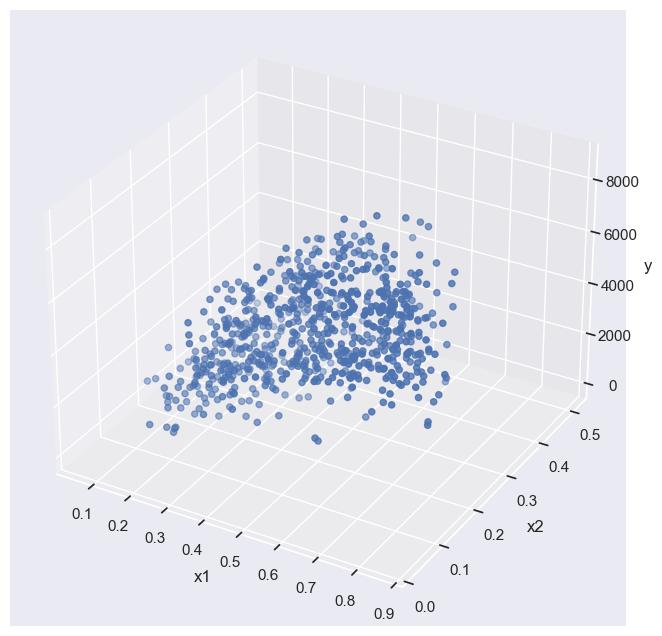

In [ ]:
X = df_day[["temp", "windspeed"]]
y = df_day["cnt"]
x1 = df_day["temp"]
x2 = df_day["windspeed"]

# グラフの設定
fig = plt.figure(figsize=(8,8)) 
ax = fig.add_subplot(111, projection='3d')

# 散布図の描画設定
ax.scatter3D (x1, x2, y)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel('y')

plt.show()

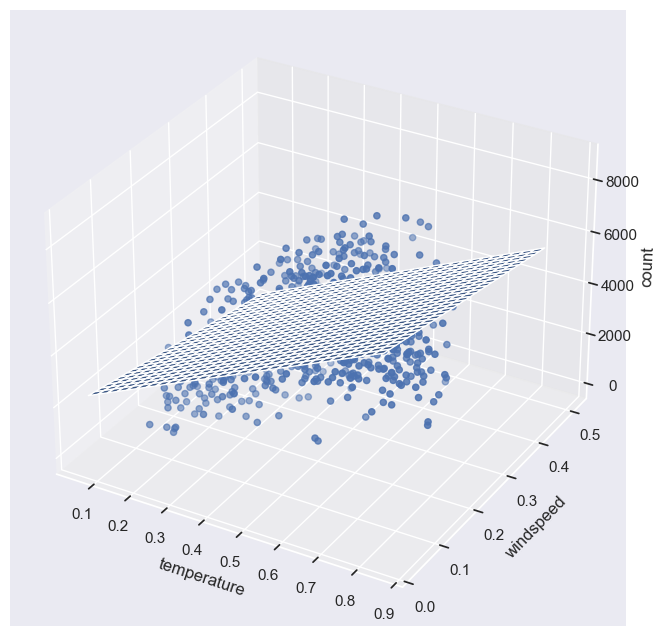

モデル関数の回帰変数 regression variables for model function: w1: 6408.536
モデル関数の回帰変数 regression variables for model function: w2: -3472.105
モデル関数の切片 interception w2: 1991.046
y= 6408.536x + -3472.105z + 1991.046
決定係数 R^2: 0.413


In [ ]:
# multiple regression with temp and windspeed

X = df_day[["temp", "windspeed"]]
y = df_day["cnt"]
x1 = df_day["temp"]
x2 = df_day["windspeed"]

# 回帰分析を実行
model_lr = LinearRegression()
model_lr.fit(X, y)
model_lr.coef_ # 係数 
a1, a2 = model_lr.coef_ # 係数を代入 
b = model_lr.intercept_ # 切片

fig = plt.figure(figsize=(8,8)) 
ax = fig.add_subplot(111, projection='3d')

# 散布図とラベルの設定 scatterplot and labeling
ax.scatter3D(x1, x2, y)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")

colors = sns.color_palette("muted")
# 回帰平面の描画 drawing regression plane
mesh_x1 = np.arange(x1.min(), x1.max(), (x1.max()-x1.min())/30)
mesh_x2 = np.arange(x2.min(), x2.max(), (x2.max()-x2.min())/30)
mesh_x1, mesh_x2 = np.meshgrid(mesh_x1, mesh_x2)
mesh_y = a1*mesh_x1 + a2*mesh_x2 + b
#ax.plot_wireframe(mesh_x1, mesh_x2, mesh_y)
ax.plot_surface(mesh_x1, mesh_x2, mesh_y)
ax.set_xlabel('temperature')
ax.set_ylabel('windspeed')
ax.set_zlabel('count')
plt.show()

print('モデル関数の回帰変数 regression variables for model function: w1: %.3f' %a1) 
print('モデル関数の回帰変数 regression variables for model function: w2: %.3f' %a2) 
print('モデル関数の切片 interception w2: %.3f' %b) 
print('y= %.3fx + %.3fz + %.3f' % (a1, a2 , model_lr.intercept_)) 
print('決定係数 R^2: %.3f'%model_lr.score(X, y))

# I got an error, saying float object is not subscriptable. then i stopped using index numbers. then it works. 
# https://www.stechies.com/typeerror-float-object-not-subscriptable/#:~:text=This%20error%20occurs%20when%20we,are%20strings%2C%20lists%2C%20dictionaries.

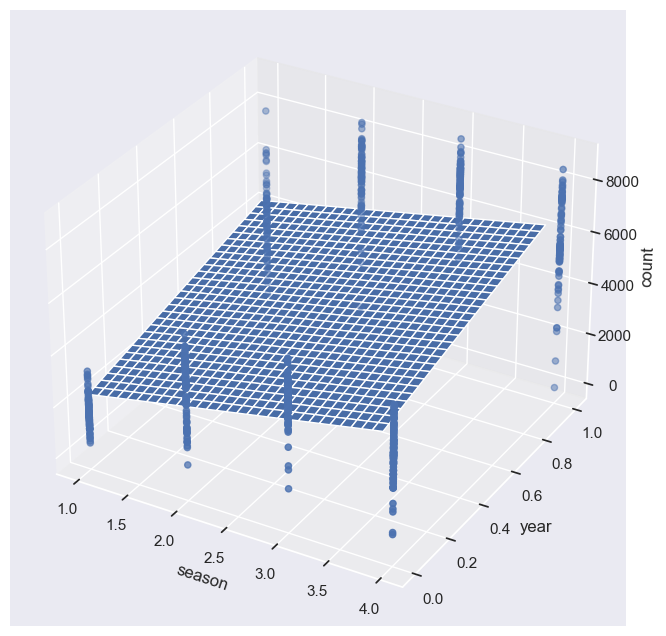

モデル関数の回帰変数 regression variables for model function: w1: 710.051
モデル関数の回帰変数 regression variables for model function: w2: 2197.080
モデル関数の切片 interception w2: 1631.607
y= 710.051x + 2197.080z + 1631.607
決定係数 R^2: 0.487


In [ ]:
X = df_day[["season", "yr"]]
y = df_day["cnt"]
x1 = df_day["season"]
x2 = df_day["yr"]

# 回帰分析を実行
model_lr = LinearRegression()
model_lr.fit(X, y)
model_lr.coef_ # 係数 
a1, a2 = model_lr.coef_ # 係数を代入 
b = model_lr.intercept_ # 切片

fig = plt.figure(figsize=(8,8)) 
ax = fig.add_subplot(111, projection='3d')

# 散布図とラベルの設定 scatterplot and labeling
ax.scatter3D(x1, x2, y)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")

colors = sns.color_palette("muted")
# 回帰平面の描画 drawing regression plane
mesh_x1 = np.arange(x1.min(), x1.max(), (x1.max()-x1.min())/30)
mesh_x2 = np.arange(x2.min(), x2.max(), (x2.max()-x2.min())/30)
mesh_x1, mesh_x2 = np.meshgrid(mesh_x1, mesh_x2)
mesh_y = a1*mesh_x1 + a2*mesh_x2 + b
#ax.plot_wireframe(mesh_x1, mesh_x2, mesh_y)
ax.plot_surface(mesh_x1, mesh_x2, mesh_y)
ax.set_xlabel('season')
ax.set_ylabel('year')
ax.set_zlabel('count')
plt.show()

print('モデル関数の回帰変数 regression variables for model function: w1: %.3f' %a1) 
print('モデル関数の回帰変数 regression variables for model function: w2: %.3f' %a2) 
print('モデル関数の切片 interception w2: %.3f' %b) 
print('y= %.3fx + %.3fz + %.3f' % (a1, a2 , model_lr.intercept_)) 
print('決定係数 R^2: %.3f'%model_lr.score(X, y))

# I got an error, saying float object is not subscriptable. then i stopped using index numbers. then it works. 
# \https://www.stechies.com/typeerror-float-object-not-subscriptable/#:~:text=This%20error%20occurs%20when%20we,are%20strings%2C%20lists%2C%20dictionaries.

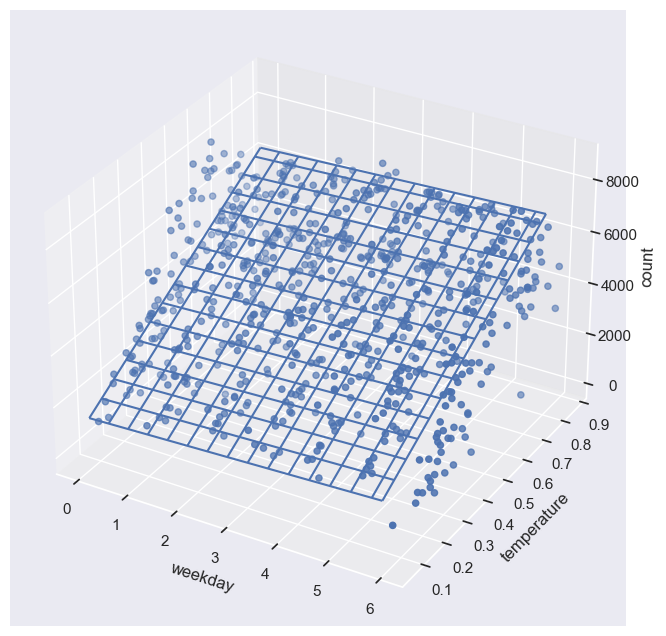

モデル関数の回帰変数 regression variables for model function: w1: 65.273
モデル関数の回帰変数 regression variables for model function: w2: 6640.832
モデル関数の切片 interception w2: 1018.941
y= 65.273x + 6640.832z + 1018.941
決定係数 R^2: 0.398


In [ ]:
# multiple regression with week day and temp: 0.39
X = df_day[["weekday", "temp"]]
y = df_day["cnt"]
x1 = df_day["weekday"]
x2 = df_day["temp"]

# 回帰分析を実行
model_lr = LinearRegression()
model_lr.fit(X, y)
model_lr.coef_ # 係数 
a1, a2 = model_lr.coef_ # 係数を代入 
b = model_lr.intercept_ # 切片

fig = plt.figure(figsize=(8,8)) 
ax = fig.add_subplot(111, projection='3d')

# 散布図とラベルの設定 scatterplot and labeling
ax.scatter3D(x1, x2, y)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")

colors = sns.color_palette("pastel")
# 回帰平面の描画 drawing regression plane
mesh_x1 = np.arange(x1.min(), x1.max(), (x1.max()-x1.min())/30)
mesh_x2 = np.arange(x2.min(), x2.max(), (x2.max()-x2.min())/30)
mesh_x1, mesh_x2 = np.meshgrid(mesh_x1, mesh_x2)
mesh_y = a1*mesh_x1 + a2*mesh_x2 + b
ax.plot_wireframe(mesh_x1, mesh_x2, mesh_y, rstride = 2, cstride = 2)
#ax.plot_surface(mesh_x1, mesh_x2, mesh_y, facecolor = colors)
ax.set_xlabel('weekday')
ax.set_ylabel('temperature')
ax.set_zlabel('count')
plt.show()

print('モデル関数の回帰変数 regression variables for model function: w1: %.3f' %a1) 
print('モデル関数の回帰変数 regression variables for model function: w2: %.3f' %a2) 
print('モデル関数の切片 interception w2: %.3f' %b) 
print('y= %.3fx + %.3fz + %.3f' % (a1, a2 , model_lr.intercept_)) 
print('決定係数 R^2: %.3f'%model_lr.score(X, y))

# I got an error, saying float object is not subscriptable. then i stopped using index numbers. then it works. 
# \https://www.stechies.com/typeerror-float-object-not-subscriptable/#:~:text=This%20error%20occurs%20when%20we,are%20strings%2C%20lists%2C%20dictionaries.

In [ ]:
X = df_day[["temp", "windspeed_a"]]
y = df_day["cnt"]

regr = linear_model.LinearRegression()
regr.fit(X,y)

predictedcnt = regr.predict([[-5,10]])
print(predictedcnt)

[-30569.85759614]


c:\Users\satom\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



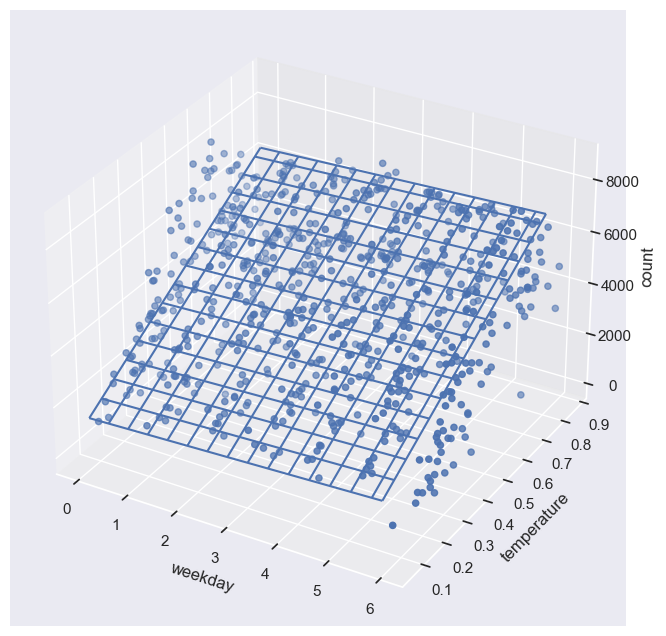

coefficience(weekday): w1: 65.273
regression variables for model function(count): w2: 6640.832
intercept w2: 1018.941
y= 65.273x + 6640.832z + 1018.941
決定係数 R^2: 0.398


In [37]:
# multiple regression with week day and temp: 0.39
X = df_day[["weekday", "temp"]]
y = df_day["cnt"]
x1 = df_day["weekday"]
x2 = df_day["temp"]

# 回帰分析を実行
model_lr = LinearRegression()
model_lr.fit(X, y)
model_lr.coef_ # 係数 
a1, a2 = model_lr.coef_ # 係数を代入 
b = model_lr.intercept_ # 切片

fig = plt.figure(figsize=(8,8)) 
ax = fig.add_subplot(111, projection='3d')

# 散布図とラベルの設定 scatterplot and labeling
ax.scatter3D(x1, x2, y)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")

colors = sns.color_palette("pastel")
# 回帰平面の描画 drawing regression plane
mesh_x1 = np.arange(x1.min(), x1.max(), (x1.max()-x1.min())/30)
mesh_x2 = np.arange(x2.min(), x2.max(), (x2.max()-x2.min())/30)
mesh_x1, mesh_x2 = np.meshgrid(mesh_x1, mesh_x2)
mesh_y = a1*mesh_x1 + a2*mesh_x2 + b
ax.plot_wireframe(mesh_x1, mesh_x2, mesh_y, rstride = 2, cstride = 2)
#ax.plot_surface(mesh_x1, mesh_x2, mesh_y, facecolor = colors)
ax.set_xlabel('weekday')
ax.set_ylabel('temperature')
ax.set_zlabel('count')
plt.show()

print('coefficience(weekday): w1: %.3f' %a1) 
print('regression variables for model function(count): w2: %.3f' %a2) 
print('intercept w2: %.3f' %b) 
print('y= %.3fx + %.3fz + %.3f' % (a1, a2 , model_lr.intercept_)) 
print('R^2: %.3f'%model_lr.score(X, y))

# I got an error, saying float object is not subscriptable. then i stopped using index numbers. then it works. 
# \https://www.stechies.com/typeerror-float-object-not-subscriptable/#:~:text=This%20error%20occurs%20when%20we,are%20strings%2C%20lists%2C%20dictionaries.

try to make time series regression

at first I make new dataframe: monthly mean count of rental bike 2011 to 2012

In [49]:
df_day_new = df_day.set_index("dteday")
df_day_new

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,temp_in_cel,feeling_temp_in_cel,windspeed_a
dteday,,,,,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2011,8.175849,7.999250,10.749882
2011-01-02,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2011,9.083466,7.346774,16.652113
2011-01-03,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2011,1.229108,-3.499270,16.636703
2011-01-04,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,2011,1.400000,-1.999948,10.739832
2011-01-05,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2011,2.666979,-0.868180,12.522300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,727,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,2012,3.945849,-1.041628,23.458911
2012-12-28,728,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,2012,3.906651,0.833036,10.416557
2012-12-29,729,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,2012,3.906651,-0.001600,8.333661


In [51]:
mnthly_df_day_2 = df_day_new[["casual", "registered", "cnt", "temp", "temp_in_cel", "feeling_temp_in_cel", "windspeed_a"]].resample(rule = "M").mean().round(2)
mnthly_df_day_2

,casual,registered,cnt,temp,temp_in_cel,feeling_temp_in_cel,windspeed_a
dteday,,,,,,,
2011-01-31,99.13,1132.77,1231.90,0.20,1.29,-2.50,13.09
2011-02-28,222.93,1499.04,1721.96,0.28,5.28,2.77,15.31
2011-03-31,413.74,1652.23,2065.97,0.33,7.59,5.47,15.57
2011-04-30,744.87,2417.47,3162.33,0.47,14.15,14.15,16.36
2011-05-31,1001.61,3379.71,4381.32,0.58,19.13,20.35,12.15
2011-06-30,1020.40,3763.33,4783.73,0.69,24.57,26.67,11.94
2011-07-31,1175.87,3383.52,4559.39,0.76,27.65,30.90,11.50
2011-08-31,930.39,3479.00,4409.39,0.71,25.15,27.26,12.78
2011-09-30,884.83,3362.43,4247.27,0.61,20.81,21.52,10.25


I want to convert data type into "int64" in following columns, season, yr, month, holiday, 

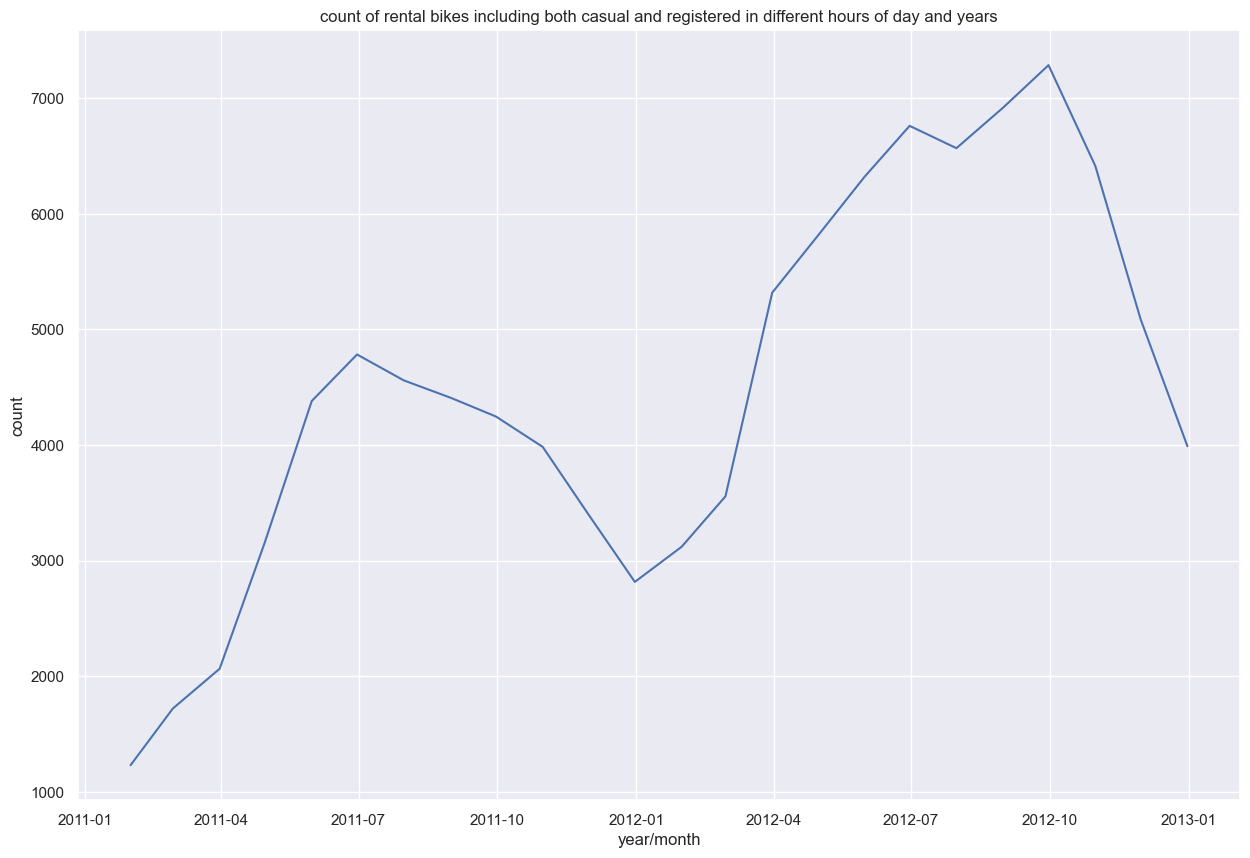

In [52]:
plt.figure(figsize=(15,10))
legend_list = [0, 1]
sns.lineplot(data= mnthly_df_day_2, x = mnthly_df_day_2.index, y = mnthly_df_day_2["cnt"] )
plt.xlabel("year/month")
plt.ylabel("count")
plt.title("count of rental bikes including both casual and registered in different hours of day and years")

#plt.legend(title = "year", edgecolor='blue', loc='upper right', bbox_to_anchor=(0.7, 0.7)) # lables = legend_list --> when i use this, the color of legend changes to black
plt.show()

RMSE Train: 1072.05, Test: 1135.42
R^2 Train: 0.58, Test: 0.50


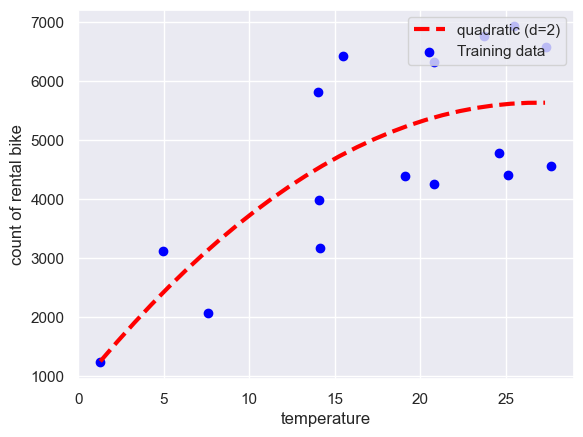

In [61]:
# independent variable
X = mnthly_df_day_2["temp_in_cel" ] # temperature
# depandent variable
y = mnthly_df_day_2["cnt"]

# train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

# LinearRegression
lr = LinearRegression()

# 2次の多項式特徴量のクラスをインスタンス化 instantiate 2 dimensional polynomial features
quadratic = PolynomialFeatures(
               degree = 2,                   # n dimension der polynomial 
               interaction_only = False,     # if true, ある特徴量を2乗以上した項がのぞかれる
               include_bias = True,          # if True, バイアス項を含める
               order = "C"                   # 出力する配列の計算順序
)

# データ演算・変換
X_quad_train  = quadratic.fit_transform(X_train)
# 回帰モデルに上記データを適合
lr.fit(X_quad_train, y_train)

"""データプロット　plot the data"""
# 多項式曲線を描くためのプロット
X_fit          = np.arange(X_train.min(), X_train.max(), 1)[:, np.newaxis]
X_quad_fit     = quadratic.fit_transform(X_fit)
y_quad_predict = lr.predict(X_quad_fit)

plt.plot(X_fit, 
         y_quad_predict, 
         label='quadratic (d=2)',
         color='red', 
         lw=3,
         linestyle='--'
        )

# 推論のために学習データ＆テストデータを変換
X_quad_train         = quadratic.fit_transform(X_train)
X_quad_test          = quadratic.fit_transform(X_test)

# 平均平方二乗誤差(RMSE)
print('RMSE Train: %.2f, Test: %.2f' % (
        mean_squared_error(y_train, lr.predict(X_quad_train), squared=False),   # 学習
        mean_squared_error(y_test, lr.predict(X_quad_test),   squared=False)    # テスト
      ))

# 決定係数(R^2)
print('R^2 Train: %.2f, Test: %.2f' % (
        r2_score(y_train, lr.predict(X_quad_train)), # 学習
        r2_score(y_test,  lr.predict(X_quad_test))   # テスト
      ))

# トレーニングデータのプロット
plt.scatter(X_train, y_train, label='Training data', color='blue')
# グラフの書式設定
plt.xlabel('temperature')
plt.ylabel('count of rental bike')
plt.legend(loc='upper right')
plt.show()

RMSE 学習 Train: 1066.05, テスト Test: 1120.23
R^2 学習 Train: 0.59, テスト Test: 0.51


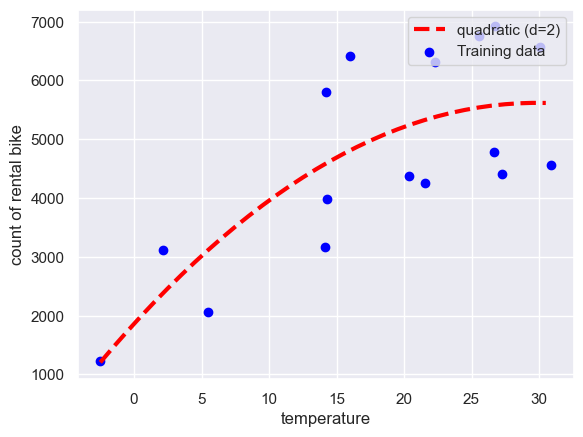

In [62]:
# independent variable
X = mnthly_df_day_2["feeling_temp_in_cel" ] # temperature
# depandent variable
y = mnthly_df_day_2["cnt"]

# train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

# LinearRegression
lr = LinearRegression()

# 2次の多項式特徴量のクラスをインスタンス化 instantiate 2 dimensional polynomial features
quadratic = PolynomialFeatures(
               degree = 2,                   # n dimension der polynomial 
               interaction_only = False,     # if true, ある特徴量を2乗以上した項がのぞかれる
               include_bias = True,          # if True, バイアス項を含める
               order = "C"                   # 出力する配列の計算順序
)

# データ演算・変換
X_quad_train  = quadratic.fit_transform(X_train)
# 回帰モデルに上記データを適合
lr.fit(X_quad_train, y_train)

"""データプロット　plot the data"""
# 多項式曲線を描くためのプロット
X_fit          = np.arange(X_train.min(), X_train.max(), 1)[:, np.newaxis]
X_quad_fit     = quadratic.fit_transform(X_fit)
y_quad_predict = lr.predict(X_quad_fit)

plt.plot(X_fit, 
         y_quad_predict, 
         label='quadratic (d=2)',
         color='red', 
         lw=3,
         linestyle='--'
        )

# 推論のために学習データ＆テストデータを変換
X_quad_train         = quadratic.fit_transform(X_train)
X_quad_test          = quadratic.fit_transform(X_test)

# 平均平方二乗誤差(RMSE)
print('RMSE 学習 Train: %.2f, テスト Test: %.2f' % (
        mean_squared_error(y_train, lr.predict(X_quad_train), squared=False),   # 学習
        mean_squared_error(y_test, lr.predict(X_quad_test),   squared=False)    # テスト
      ))

# 決定係数(R^2)
print('R^2 学習 Train: %.2f, テスト Test: %.2f' % (
        r2_score(y_train, lr.predict(X_quad_train)), # 学習
        r2_score(y_test,  lr.predict(X_quad_test))   # テスト
      ))

# トレーニングデータのプロット
plt.scatter(X_train, y_train, label='Training data', color='blue')
# グラフの書式設定
plt.xlabel('temperature')
plt.ylabel('count of rental bike')
plt.legend(loc='upper right')
plt.show()

time series: seasonal decompose

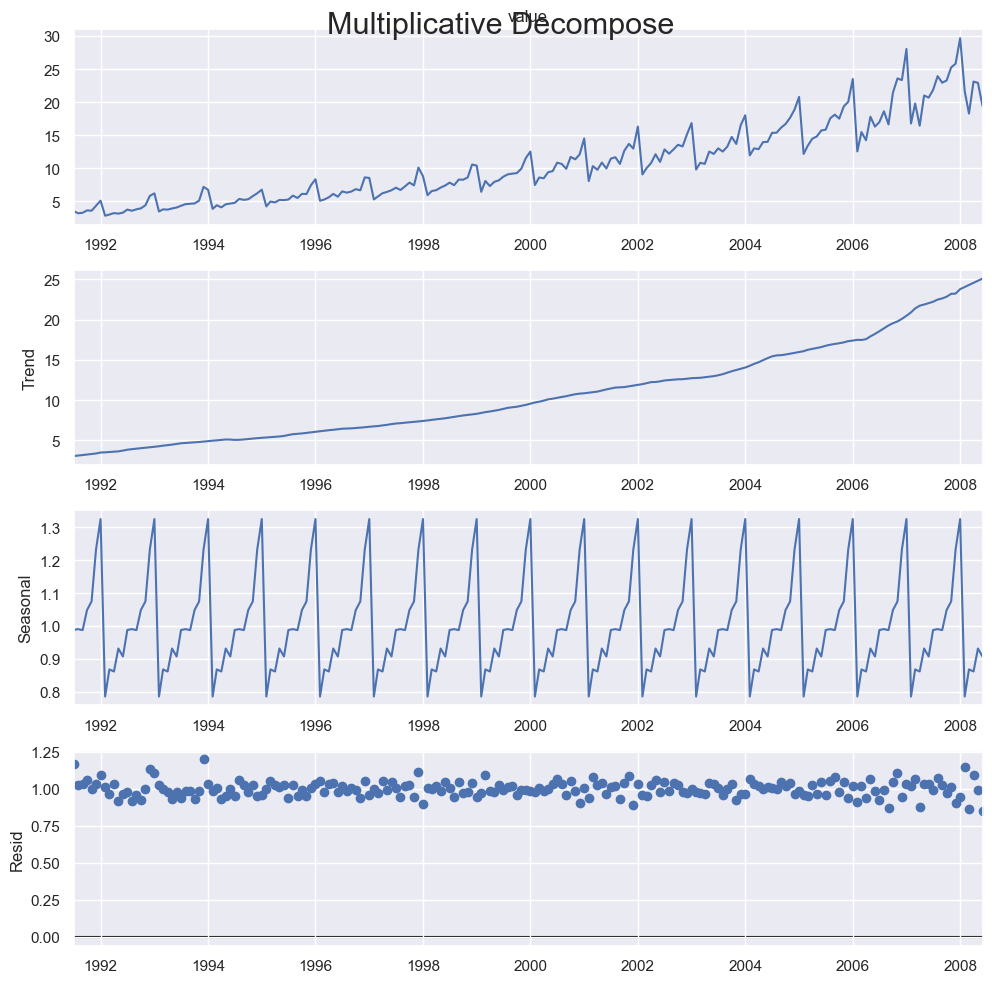

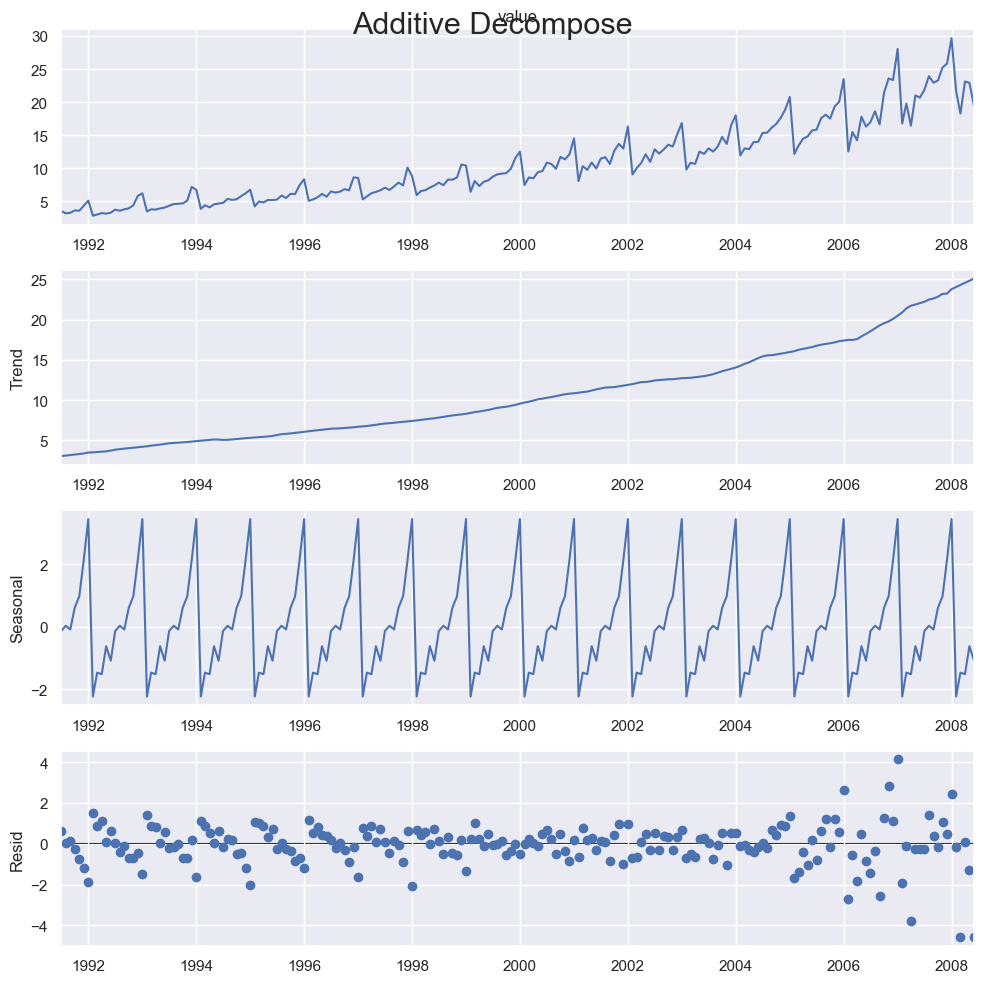

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

# setting extrapolate_trend = "freq" takes care of any missing values in the trend and residuals at the beginning of the series